# Overview 
    As the volumn of data explosively grows in modern society, people are becoming more incapable of handling these data themselves. Instead, people developed a bunch of useful tools on computer to help them understand the data. One of the most prevalent tool for analyzing data is clustering method. Today, we are going to use two clustering methods, kmeans and hierachical clustering on a grocery data set to try to understand the underlying meaning of diabetes dataset. We will perform an EDA first to see the overall relationships between factors and use clustering methods to verify. 

# Data
    The dataset "Wholesale customers data" is coming from grocery store distributor in Portugal. It includes 440 records of grocery and their 8 different features, "Channel	Region	Fresh	Milk	Grocery	Frozen	Detergents_Paper	Delicassen!" respectively. It is different from datasets we dealt with before because it does not have a target variable. Therefore, we will need to use unsupervised methods, clustering, to find the hidden patterns inside the data.

First, we need to load the library and data

In [14]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# loading data
df = pd.read_csv('Wholesale customers data.csv')


# Exploratory Data Analysis 

Since we are trying to understand the hidden pattern under the diabetes dataset, it is quite helpful for us to take a EDA on the dataset and have a good look of what might be going on. 

The first thing to look at is the dimensions of the dataset

In [15]:
df.shape

(440, 8)

This dataset has 440 records of grocery information. Each record has 8 elements.

Check whether there is null values in the dataset

In [16]:
df.isnull().values.any()

False

This dataset turns out to be quite clean without any missing value. I guess it is preprocessed by professional people and then uploaded. 

Summary for numeric independent variables

In [18]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Build a histogram of region

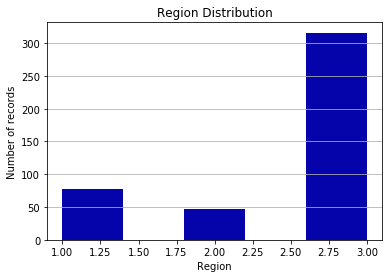

In [28]:
n, bins, patches = plt.hist(x = df.Region, bins = 5, color = '#0504aa')
plt.grid(axis='y', alpha=2)
plt.xlabel('Region')
plt.ylabel('Number of records')
plt.title('Region Distribution')
plt.show()

We can see that most of the purchases are made in region 3

Build a histogram of channel

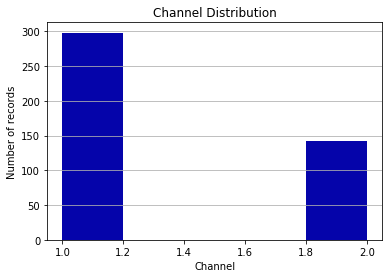

In [30]:
n, bins, patches = plt.hist(x = df.Channel, bins = 5, color = '#0504aa')
plt.grid(axis='y', alpha=2)
plt.xlabel('Channel')
plt.ylabel('Number of records')
plt.title('Channel Distribution')
plt.show()

We can see that most of the purchases are made in channel 1

# Models
    The next step is to understand the dataset is to build some models and put the data in so that we can have a look about how can a computer interpret the data. For this assignment, I will use the kmean clustering and hierachical clustering

First of all, we need to consider whether we should normalize the data or not. In this situation, because the scale is meaningful, representing distribution of how many different item purchased. I would say there is no need for us to regularize the data.

In [72]:
kmeans = KMeans(n_clusters=5).fit(data)

centroids = kmeans.cluster_centers_
print(centroids)

[[1.91358025e+00 2.51851852e+00 4.99148148e+03 1.21405432e+04
  1.85055062e+04 1.59111111e+03 8.14824691e+03 1.82240741e+03]
 [1.20192308e+00 2.54807692e+00 2.18751827e+04 3.94232692e+03
  5.17888462e+03 3.88672115e+03 1.12255769e+03 1.68729808e+03]
 [2.00000000e+00 2.57142857e+00 2.00312857e+04 3.80840000e+04
  5.61261429e+04 2.56457143e+03 2.76445714e+04 2.54814286e+03]
 [1.09523810e+00 2.66666667e+00 5.05120952e+04 6.98752381e+03
  6.47809524e+03 1.02153810e+04 1.03052381e+03 4.90476190e+03]
 [1.16740088e+00 2.53744493e+00 6.16664758e+03 3.27596916e+03
  4.10611894e+03 2.58183260e+03 1.21563877e+03 1.00005286e+03]]


Text(0, 0.5, 'Inertia')

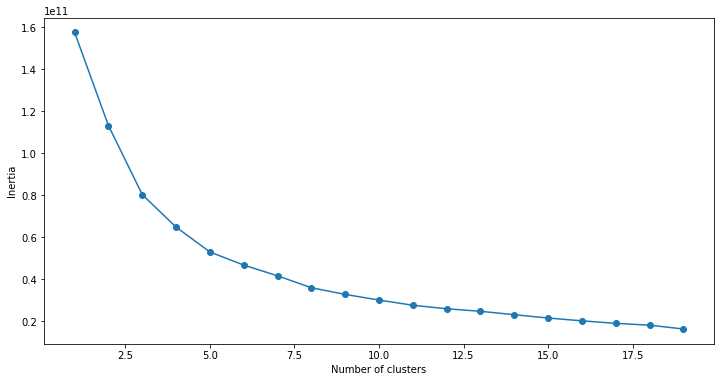

In [33]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


From the graph above, I think number of clusters should be 5. The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly. As we can see in the resulting plot, the elbow is located at k = 5, which is evidence that k = 5 is indeed a good choice for this dataset.

In [73]:
y_kmeans = kmeans.predict(df)

Let first compare the Region and milk. 

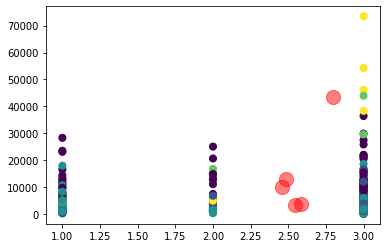

In [61]:
plt.scatter(df.Region, df.Milk, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 1], centers[:, 3], c='red', s=200, alpha=0.5);

From the graph, we can see that there is not much pattern inside it. 

Let then compare the Fresh and milk. 

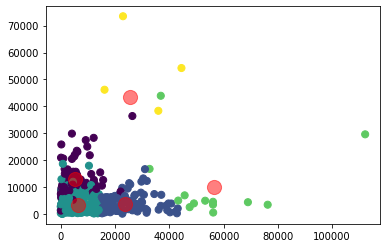

In [62]:
plt.scatter(df.Fresh, df.Milk, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5);

From the graph, we can see there is a pattern that people buying more fresh => buying more milk.

In [74]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, y_kmeans)
silhouette_avg

0.3725879842281544

For n_clusters = 5 The average silhouette_score is : 0.3725879842281544

From the cluster distribution on the graph above, I think there are 5 group of people are have different grocery habits. The first one(bottom left) buys little Fresh food and milk. The second one (bottom mid) buys normal amount of Fresh and little milk. The third one (bottom right) buys a lot of Fresh food and little milk. The fourth one(middle left) buy median amount of milk and little Fresh food and the last one (top middle) buys median amount of Fresh food nad milk.

The second model I am going to use is hierachical clustering. 

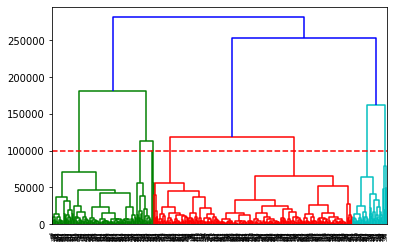

In [80]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=100000, color='r', linestyle='--')


In [85]:
clustering = AgglomerativeClustering().fit(df)
y_means = AgglomerativeClustering(5).fit_predict(df)



Let compare the Fresh and milk. 

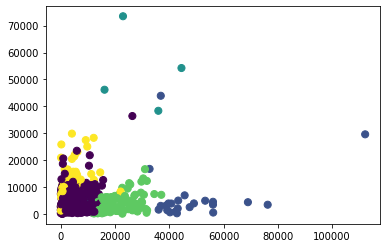

In [86]:
plt.scatter(df.Fresh, df.Milk, c=y_means, s=50, cmap='viridis')


In [88]:
silhouette_avg = silhouette_score(df, y_means)
silhouette_avg

0.35222835905395905

For n_clusters = 5 The average silhouette_score is : 0.3725879842281544

# Conclusions

Clustering is definitely a simple and powerful tool for people to do analysis on seemingly random dataset without a target variable. I have used kmeans clustering and hierarchical clustering on this grocery dataset. The idea number of cluster is 5 and both of these clustering methods yield a silhouette score of about 0.35. 

<br>

Even though these two method results in almost the same result, I can notice that there are some subtle differences between them. It can find the point that are closer to it cluster. However, if we have data like two circles, one is inside the other one, kmeans will not give good result. Also, it is hard to decide the number of cluster. On the other hand, hierarchical clustering is high in time complexity. But it is more informative than kmeans like telling you the ideal number of cluster<br>

